# PREPROCESSING DATA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

### Loading Dataset

In [27]:
df = pd.read_csv('booking.csv')

### Understanding Dataset

In [28]:
df.sample(5)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
28967,INN28968,2,0,2,3,Meal Plan 1,0,Room_Type 1,87,Offline,0,0,0,75.00,0,5/8/2018,Not_Canceled
31631,INN31632,2,0,1,4,Meal Plan 1,0,Room_Type 4,41,Online,0,0,0,114.04,0,3/28/2018,Not_Canceled
810,INN00811,2,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,139.00,1,7/14/2018,Not_Canceled
35180,INN35181,2,0,2,5,Meal Plan 1,0,Room_Type 4,17,Online,0,0,0,119.71,1,10/3/2017,Not_Canceled
32257,INN32258,2,0,1,5,Not Selected,0,Room_Type 1,18,Online,0,0,0,62.83,1,2/22/2018,Not_Canceled


In [29]:
df.shape

(36285, 17)

In [30]:
df.describe()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,special requests
count,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000,36285.000000
mean,1.844839,0.105360,0.810693,2.204602,0.030977,85.239851,0.025630,0.023343,0.153369,103.421636,0.619733
std,0.518813,0.402704,0.870590,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000


### Checking for null values

In [31]:
print(df.isnull().sum().sort_values(ascending=False))

Booking_ID                  0
market segment type         0
date of reservation         0
special requests            0
average price               0
P-not-C                     0
P-C                         0
repeated                    0
lead time                   0
number of adults            0
room type                   0
car parking space           0
type of meal                0
number of week nights       0
number of weekend nights    0
number of children          0
booking status              0
dtype: int64


In [32]:
df.nunique()

Booking_ID                  36285
number of adults                5
number of children              6
number of weekend nights        8
number of week nights          18
type of meal                    4
car parking space               2
room type                       7
lead time                     352
market segment type             5
repeated                        2
P-C                             9
P-not-C                        59
average price                3930
special requests                6
date of reservation           553
booking status                  2
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [34]:
df["booking status"].value_counts()

booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

In [35]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

### Change column names

In [36]:
# Renaming dataframe columns
# Replacing space with underscore
df.columns = [name.replace(' ','_') for name in df.columns]

In [37]:
df.columns

Index(['Booking_ID', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'P-C', 'P-not-C', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status'],
      dtype='object')

### Change datatypes (date, categorical)

In [38]:
def df_turn_datatype_to_categorical(df,column_names):
    """
    In a dataframe turns the given columns' data types to categorical.

    :param df: dataframe 
    :param column_names: list- column names 
  
    :return df:dataframe -Returns the dataframe after changing data types to categorical for given column names
    """
    for column_name in column_names:
        df[column_name] = df[column_name].astype('category')
    return df 

In [39]:
# Changing the categorical datas' dtype to category 
df = df_turn_datatype_to_categorical(df,['type_of_meal', 'room_type', 'market_segment_type', 'booking_status' ])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Booking_ID                36285 non-null  object  
 1   number_of_adults          36285 non-null  int64   
 2   number_of_children        36285 non-null  int64   
 3   number_of_weekend_nights  36285 non-null  int64   
 4   number_of_week_nights     36285 non-null  int64   
 5   type_of_meal              36285 non-null  category
 6   car_parking_space         36285 non-null  int64   
 7   room_type                 36285 non-null  category
 8   lead_time                 36285 non-null  int64   
 9   market_segment_type       36285 non-null  category
 10  repeated                  36285 non-null  int64   
 11  P-C                       36285 non-null  int64   
 12  P-not-C                   36285 non-null  int64   
 13  average_price             36285 non-null  floa

In [41]:
# Find the dates that doesn't fit the date format
df.query('date_of_reservation == "2018-2-29"').info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 2626 to 35481
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Booking_ID                37 non-null     object  
 1   number_of_adults          37 non-null     int64   
 2   number_of_children        37 non-null     int64   
 3   number_of_weekend_nights  37 non-null     int64   
 4   number_of_week_nights     37 non-null     int64   
 5   type_of_meal              37 non-null     category
 6   car_parking_space         37 non-null     int64   
 7   room_type                 37 non-null     category
 8   lead_time                 37 non-null     int64   
 9   market_segment_type       37 non-null     category
 10  repeated                  37 non-null     int64   
 11  P-C                       37 non-null     int64   
 12  P-not-C                   37 non-null     int64   
 13  average_price             37 non-null     float64 


In [42]:
df.date_of_reservation = df.date_of_reservation.str.replace('2018-2-29', '2/29/2018')

In [43]:
# In 2018 Feb doesn't have 29 days
# Moving the data that have booking date 2/29/2018 to the previous day
df.date_of_reservation = df.date_of_reservation.str.replace('2/29/2018', '2/28/2018')


In [44]:
# Change date of reservation column's dtype to datetime
df['date_of_reservation'] = pd.to_datetime(df['date_of_reservation'], format='%m/%d/%Y') 

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Booking_ID                36285 non-null  object        
 1   number_of_adults          36285 non-null  int64         
 2   number_of_children        36285 non-null  int64         
 3   number_of_weekend_nights  36285 non-null  int64         
 4   number_of_week_nights     36285 non-null  int64         
 5   type_of_meal              36285 non-null  category      
 6   car_parking_space         36285 non-null  int64         
 7   room_type                 36285 non-null  category      
 8   lead_time                 36285 non-null  int64         
 9   market_segment_type       36285 non-null  category      
 10  repeated                  36285 non-null  int64         
 11  P-C                       36285 non-null  int64         
 12  P-not-C           

### Handle Outliers

In [46]:
df.columns

Index(['Booking_ID', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'P-C', 'P-not-C', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status'],
      dtype='object')

Text(0.5, 1.0, 'Detecting Outliers with Boxplots')

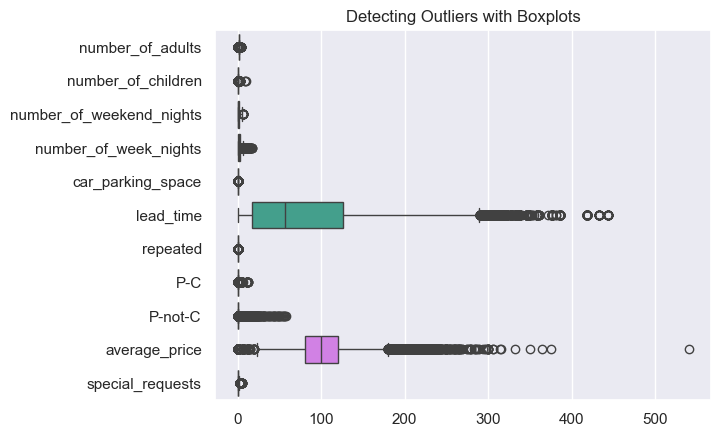

In [22]:
## Looking at boxplots the find the outliers
sns.set_theme(style="darkgrid")
sns.boxplot( data=df,orient='h')
plt.title('Detecting Outliers with Boxplots')


In [15]:
# Find the thresold of outliers with IQR
# IQR normally between first quartile(25) and third quartile(75) 
# But here we define range as between 10th 90th percentile
# If data higher than sum of 90th percentile and range times 1.5 count as a outlier
# If data lower than difference of 10th percentile and range times 1.5 count as a outlier
def outlier_thresholds(df, col_name, p1=0.1, p2=0.9):
    percentile1 = df[col_name].quantile(p1)
    percentile2 = df[col_name].quantile(p2)
    interpercentile_range = percentile2 - percentile1
    up_limit = percentile2 + 1.5 * interpercentile_range
    low_limit = percentile1 - 1.5 * interpercentile_range
    return low_limit, up_limit # To find low and up thresholds


def check_outlier(df, col_name):
    low_limit, up_limit = outlier_thresholds(df, col_name)
    if ((df[col_name] > up_limit) | (df[col_name] < low_limit)).any():
        return True
    else:
        return False # To check if variables have outliers.
    
# If outliers exists get the outliers
# Getting the outliers tresholds and finding the data exceeding thresholds
def get_outlier(df,col_name):
    low_limit, up_limit = outlier_thresholds(df, col_name)
    if check_outlier(df,col_name):
        return df[(df[col_name] > up_limit) | (df[col_name] < low_limit)]
    else:
        return 'No outlier found'

    

In [19]:
num_cols =['number_of_adults', 'number_of_children',
          'number_of_weekend_nights', 'number_of_week_nights', 
            'lead_time', 'P-C', 'P-not-C', 'average_price',]

In [20]:
# Checking the columns that has outliers
for col in num_cols:
    print(f"{col} : {check_outlier(df, col)}")

number_of_adults : True
number_of_children : True
number_of_weekend_nights : True
number_of_week_nights : True
lead_time : False
P-C : True
P-not-C : True
average_price : True


#### Average Price

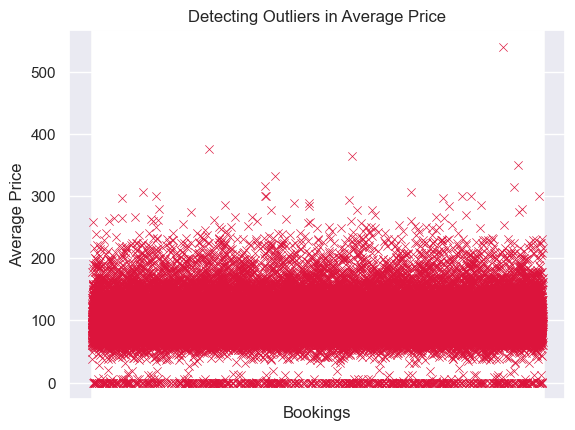

In [25]:
# Scatter plot for average price to see outliers
sns.scatterplot(data=df,
                x="Booking_ID",
                y="average_price",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Average Price')
plt.title('Detecting Outliers in Average Price')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)


In [21]:
# Avarage price outliers statistic values
# There are 33 outliers between 269-540
get_outlier(df,'average_price')['average_price'].describe()

count     33.000000
mean     305.610303
std       49.172390
min      269.300000
25%      279.200000
50%      296.000000
75%      306.000000
max      540.000000
Name: average_price, dtype: float64

<Axes: xlabel='average_price', ylabel='Count'>

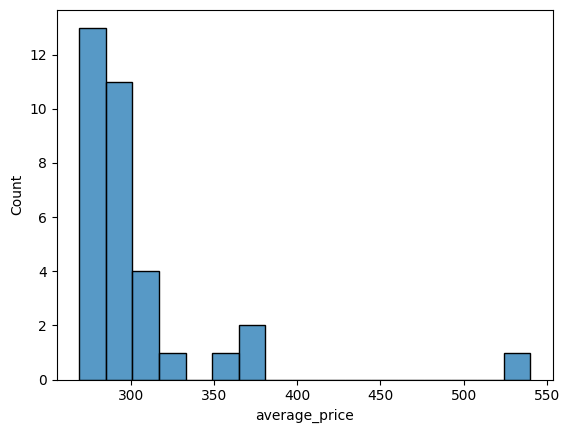

In [22]:
# Plotting outliers
sns.histplot(get_outlier(df,'average_price')['average_price'])

In [60]:
import math


def replace_average_price_outlier_with_median_of_similar_rows(df,col_name='average_price'):
    threshold = outlier_thresholds(df, col_name)[1]
    try:
        outlier_index = get_outlier(df, col_name).index
    except TypeError:
        return 'No outlier found'
    for index in outlier_index:
        # Getting the outlier's data
        number_of_adults=df.loc[index,'number_of_adults']
        number_of_children=df.loc[index,'number_of_children']
        number_of_weekend_nights=df.loc[index,'number_of_weekend_nights']
        number_of_week_nights=df.loc[index,'number_of_week_nights']
        type_of_meal=df.loc[index,'type_of_meal']
        room_type=df.loc[index,'room_type']
        # Getting the median of outlier's similar rows 
        new_value =df.query('number_of_adults == @number_of_adults & \
                            number_of_week_nights == @number_of_week_nights & \
                            number_of_children == @number_of_children & \
                            number_of_weekend_nights == @number_of_weekend_nights & \
                            type_of_meal == @type_of_meal  & \
                            room_type ==@room_type  & \
                            average_price < @threshold')[col_name].median()
        if math.isnan(new_value):
            new_value =df.query('number_of_adults == @number_of_adults & \
                            number_of_week_nights == @number_of_week_nights & \
                            number_of_weekend_nights == @number_of_weekend_nights & \
                            type_of_meal == @type_of_meal  & \
                            average_price < @threshold')[col_name].median()
        df.loc[index,col_name]=new_value
    return 'Outliers filled with similar rows median value'



In [61]:
replace_average_price_outlier_with_median_of_similar_rows(df,'average_price')

'Outliers filled with similar rows median value'

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Booking_ID                36285 non-null  object        
 1   number_of_adults          36285 non-null  int64         
 2   number_of_children        36285 non-null  int64         
 3   number_of_weekend_nights  36285 non-null  int64         
 4   number_of_week_nights     36285 non-null  int64         
 5   type_of_meal              36285 non-null  category      
 6   car_parking_space         36285 non-null  int64         
 7   room_type                 36285 non-null  category      
 8   lead_time                 36285 non-null  int64         
 9   market_segment_type       36285 non-null  category      
 10  repeated                  36285 non-null  int64         
 11  P-C                       36285 non-null  int64         
 12  P-not-C           

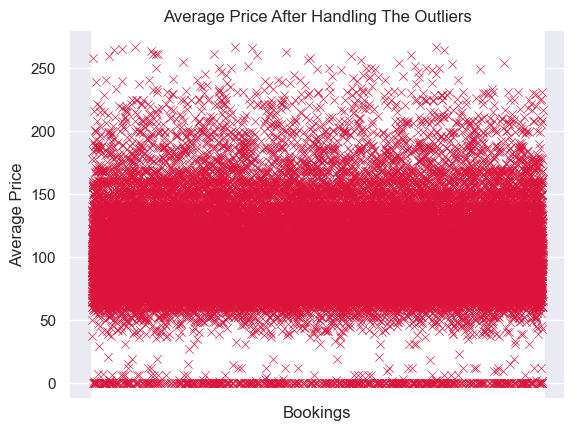

In [23]:
# Scatter plot for average price to after handling outliers
sns.scatterplot(data=df,
                x="Booking_ID",
                y="average_price",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Average Price')
plt.title('Average Price After Handling The Outliers')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)


### Number of Children

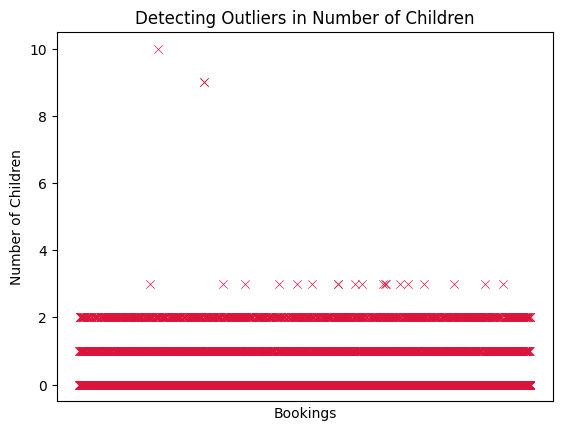

In [ ]:
sns.scatterplot(data=df,
                x="Booking_ID",
                y="number_of_children",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Children')
plt.title('Detecting Outliers in Number of Children')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

In [26]:
get_outlier(df,'number_of_children')['number_of_children'].describe()

count    2702.000000
mean        1.414878
std         0.570119
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: number_of_children, dtype: float64

<Axes: xlabel='number_of_children', ylabel='Count'>

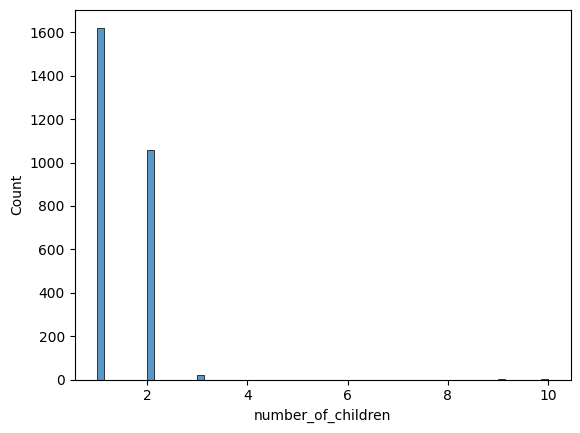

In [27]:
# Plotting outliers
sns.histplot(get_outlier(df,'number_of_children')['number_of_children'])

In [28]:
# In this plot it doesn't make sense to change number of children
# because it effects other variables 
# because of most of the data number of children is 0 
# it doesn't mean one children or two children is outliers 
# but having more than 8 children could be outliers 
df.query('number_of_children > 8')

,Booking_ID,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,P-C,P-not-C,average_price,special_requests,date_of_reservation,booking_status
6338,INN06339,2,10,0,2,Meal Plan 1,0,Room_Type 4,37,Online,0,0,0,84.45,1,2018-01-12,Not_Canceled
10041,INN10042,1,9,2,1,Meal Plan 1,0,Room_Type 1,11,Corporate,0,0,0,95.00,0,2017-10-11,Not_Canceled
10061,INN10062,2,9,2,5,Meal Plan 1,0,Room_Type 2,8,Online,0,0,0,76.50,1,2017-08-13,Canceled


In [63]:
def replace_number_of_children_outlier_with_median_of_similar_rows(df, threshold, col_name='number_of_children'):
    try:
        outlier_index = df[(df[col_name] > threshold)].index
    except TypeError:
        return 'No outlier found'
    for index in outlier_index:
        # Getting the outlier's data
        number_of_adults=df.loc[index,'number_of_adults']
        average_price=df.loc[index,'average_price']
        type_of_meal=df.loc[index,'type_of_meal']
        room_type=df.loc[index,'room_type']
        # Getting the median of outlier's similar rows 
        new_value =df.query('number_of_adults == @number_of_adults & \
                             type_of_meal == @type_of_meal  & \
                            room_type ==@room_type  & \
                            average_price ==@average_price  & \
                            number_of_children < @threshold')[col_name].median()
        df.loc[index,col_name]=round(new_value)
    return 'Outliers filled with similar rows median value'


In [64]:
replace_number_of_children_outlier_with_median_of_similar_rows(df, 8)

'Outliers filled with similar rows median value'

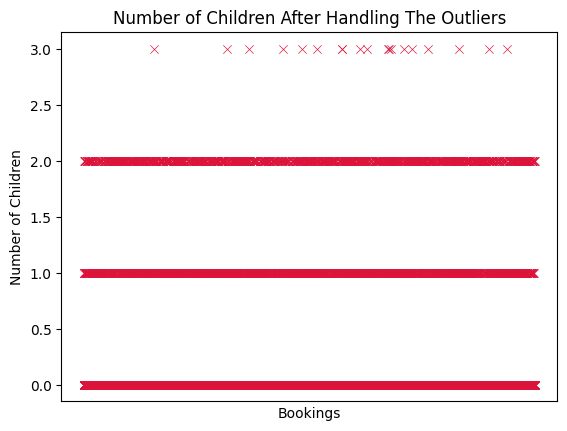

In [31]:
sns.scatterplot(data=df,
                x="Booking_ID",
                y="number_of_children",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Children')
plt.title('Number of Children After Handling The Outliers')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

### Number of Adults

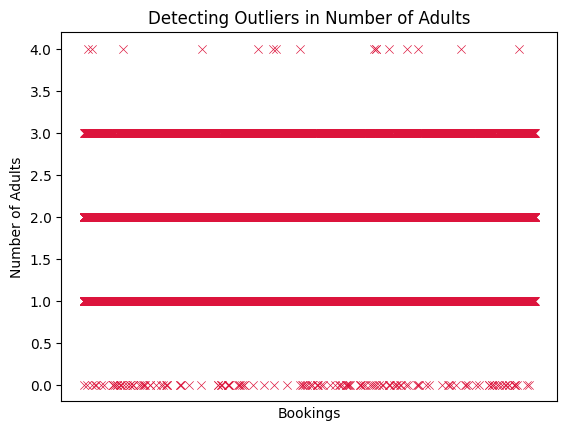

In [ ]:
sns.scatterplot(data=df,
                x="Booking_ID",
                y="number_of_adults",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Adults')
plt.title('Detecting Outliers in Number of Adults')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

In [ ]:
# When adult number is 4 detected as an outliers
get_outlier(df,'number_of_adults')['number_of_adults'].describe()

count    16.0
mean      4.0
std       0.0
min       4.0
25%       4.0
50%       4.0
75%       4.0
max       4.0
Name: number_of_adults, dtype: float64

(0.0, 4.0)

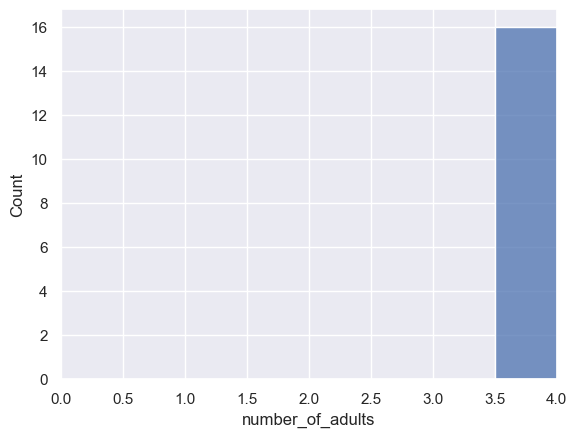

In [ ]:
# Plotting outliers
sns.histplot(get_outlier(df,'number_of_adults')['number_of_adults'])
plt.xlim(0,4)

In [ ]:
# Same with number of children number of adult as a 4 is not a outlier

### Number of Weekend Nights

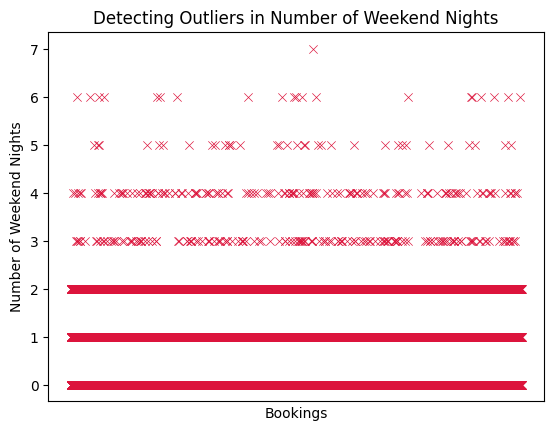

In [ ]:
sns.scatterplot(data=df,
                x="Booking_ID",
                y="number_of_weekend_nights",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Weekend Nights')
plt.title('Detecting Outliers in Number of Weekend Nights')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

In [ ]:
# number_of_weekend_nights outliers statistic values
# There are 21 outliers between 6 and 7
get_outlier(df,'number_of_weekend_nights')['number_of_weekend_nights'].describe()

count    21.000000
mean      6.047619
std       0.218218
min       6.000000
25%       6.000000
50%       6.000000
75%       6.000000
max       7.000000
Name: number_of_weekend_nights, dtype: float64

<Axes: xlabel='number_of_weekend_nights', ylabel='Count'>

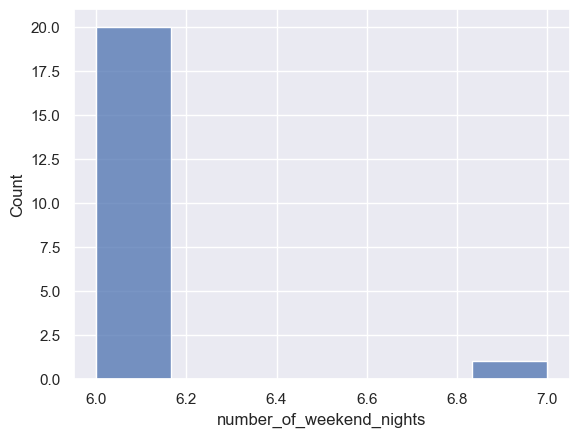

In [ ]:
# Plotting outliers
sns.histplot(get_outlier(df,'number_of_weekend_nights')['number_of_weekend_nights'])

In [65]:
def replace_number_of_weekend_nights_outlier_with_median_of_similar_rows(df,col_name='number_of_weekend_nights'):
    threshold = outlier_thresholds(df, col_name)[1]
    try:
        outlier_index = get_outlier(df, col_name).index
    except TypeError:
        return 'No outlier found'
    for index in outlier_index:
        # Getting the outlier's data
        number_of_adults=df.loc[index,'number_of_adults']
        number_of_children=df.loc[index,'number_of_children']
        number_of_weekend_nights=df.loc[index,'number_of_weekend_nights']
        type_of_meal=df.loc[index,'type_of_meal']
        room_type=df.loc[index,'room_type']
        # Getting the median of outlier's similar rows 
        new_value =df.query('number_of_adults == @number_of_adults & \
                            number_of_children == @number_of_children & \
                            type_of_meal == @type_of_meal  & \
                            room_type ==@room_type  & \
                            number_of_weekend_nights < @threshold')[col_name].median()
        
        df.loc[index,col_name]=round(new_value)
    return 'Outliers filled with similar rows median value'

In [66]:
replace_number_of_weekend_nights_outlier_with_median_of_similar_rows(df)

'Outliers filled with similar rows median value'

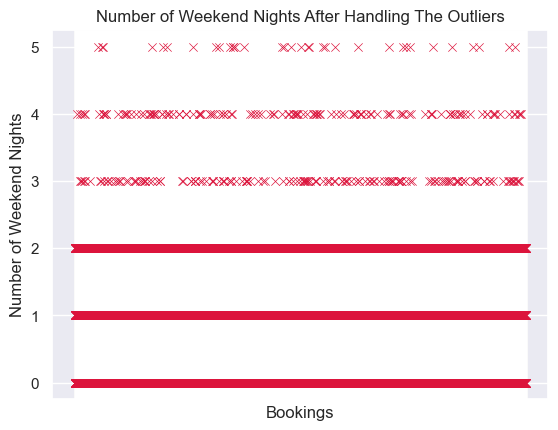

In [55]:
sns.scatterplot(data=df,
                x="Booking_ID",
                y="number_of_weekend_nights",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Weekend Nights')
plt.title('Number of Weekend Nights After Handling The Outliers')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

### Number of Week Nights

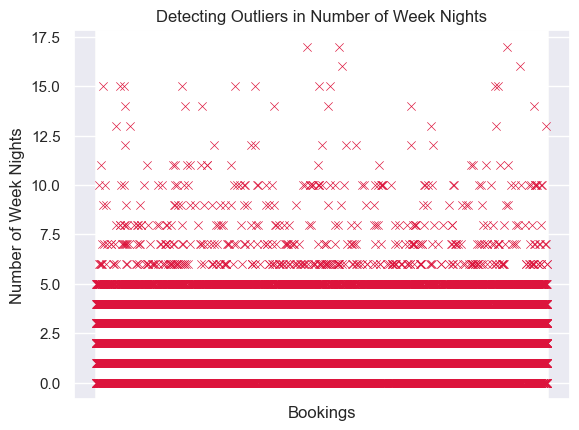

In [56]:
sns.scatterplot(data=df,
                x="Booking_ID",
                y="number_of_week_nights",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Week Nights')
plt.title('Detecting Outliers in Number of Week Nights')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

In [58]:
# number_of_weekend_nights outliers statistic values
# There are 149 outliers between 9 and 17
get_outlier(df,'number_of_week_nights')['number_of_week_nights'].describe()

count    149.000000
mean      10.852349
std        2.021425
min        9.000000
25%       10.000000
50%       10.000000
75%       11.000000
max       17.000000
Name: number_of_week_nights, dtype: float64

In [28]:
# From the plot we can see after 11 data lessen. 
df.query('number_of_week_nights >11')['number_of_week_nights'].describe()

count    36.000000
mean     14.000000
std       1.567528
min      12.000000
25%      12.750000
50%      14.000000
75%      15.000000
max      17.000000
Name: number_of_week_nights, dtype: float64

<Axes: xlabel='number_of_week_nights', ylabel='Count'>

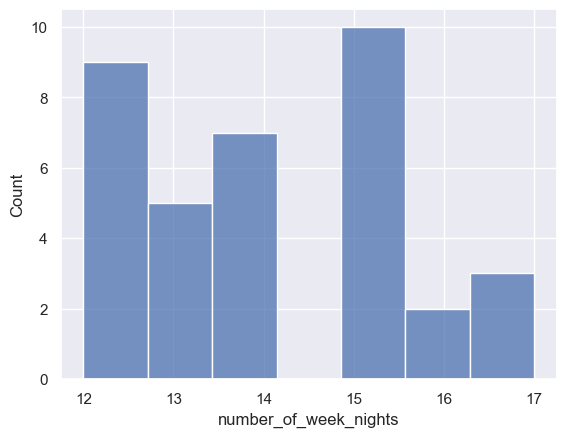

In [67]:
# Plotting outliers
sns.histplot(df.query('number_of_week_nights >11')['number_of_week_nights'])

In [67]:
def replace_number_of_week_nights_outlier_with_median_of_similar_rows(df, threshold, col_name='number_of_week_nights'):
    try:
        outlier_index = df[(df[col_name] > threshold)].index
    except TypeError:
        return 'No outlier found'
    for index in outlier_index:
        # Getting the outlier's data
        number_of_adults=df.loc[index,'number_of_adults']
        number_of_children=df.loc[index,'number_of_children']
        number_of_weekend_nights=df.loc[index,'number_of_weekend_nights']
        type_of_meal=df.loc[index,'type_of_meal']
        room_type=df.loc[index,'room_type']
        average_price=df.loc[index,'average_price']
        # Getting the median of outlier's similar rows 
        new_value =df.query('number_of_adults == @number_of_adults & \
                            number_of_children == @number_of_children & \
                            type_of_meal == @type_of_meal  & \
                            room_type ==@room_type  & \
                            number_of_weekend_nights < @threshold')[col_name].median()
        
        df.loc[index,col_name]=round(new_value)
    return 'Outliers filled with similar rows median value'

In [68]:
replace_number_of_week_nights_outlier_with_median_of_similar_rows(df,11)

'Outliers filled with similar rows median value'

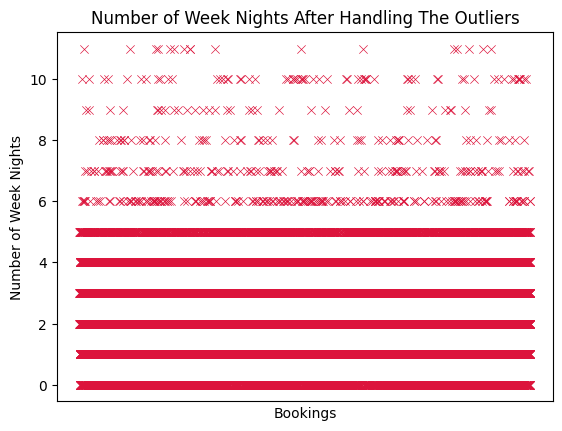

In [43]:
sns.scatterplot(data=df,
                x="Booking_ID",
                y="number_of_week_nights",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Week Nights')
plt.title('Number of Week Nights After Handling The Outliers')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

### P-C

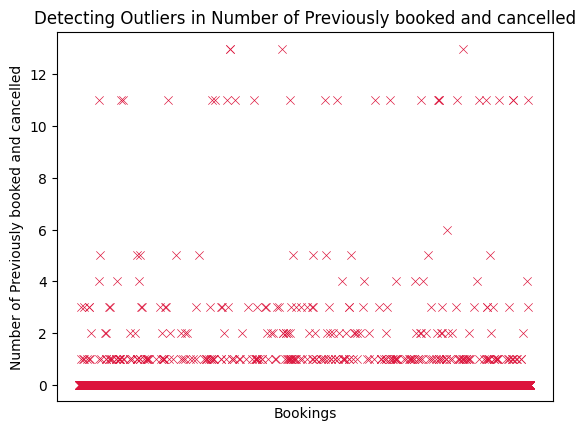

In [ ]:
sns.scatterplot(data=df,
                x="Booking_ID",
                y="P-C",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Previously booked and cancelled')
plt.title('Detecting Outliers in Number of Previously booked and cancelled')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

In [38]:
# number_of_weekend_nights outliers statistic values
# There are 21 outliers between 6 and 7
get_outlier(df,'P-C')['P-C'].describe()

count    338.000000
mean       2.505917
std        2.891966
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max       13.000000
Name: P-C, dtype: float64

In [42]:
df.columns

Index(['Booking_ID', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'P-C', 'P-not-C', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status'],
      dtype='object')

In [49]:
df[df['P-C']>10]['P-C'].describe()

count    29.000000
mean     11.275862
std       0.701862
min      11.000000
25%      11.000000
50%      11.000000
75%      11.000000
max      13.000000
Name: P-C, dtype: float64

<Axes: xlabel='P-C', ylabel='Count'>

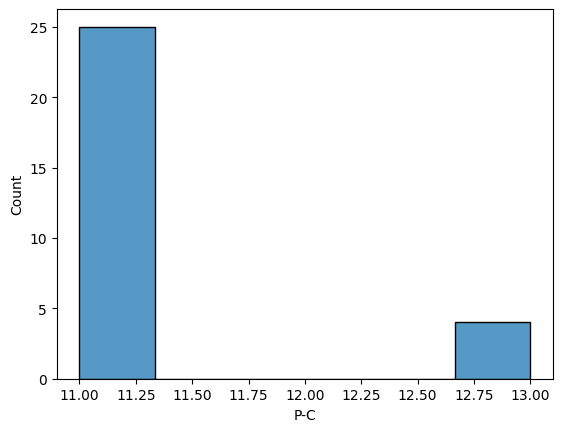

In [50]:
# Plotting outliers
sns.histplot(df[df['P-C']>10]['P-C'])

In [69]:
df = df.rename(columns={'P-C': 'P_C', 'P-not-C': 'P_not_C'})


In [70]:
def replace_P_C_outlier_with_median_of_similar_rows(df, threshold, col_name='P_C'):
    try:
        outlier_index = df[(df[col_name] > threshold)].index
    except TypeError:
        return 'No outlier found'
    for index in outlier_index:
        # Getting the outlier's data
        number_of_adults=df.loc[index,'number_of_adults']
        number_of_children=df.loc[index,'number_of_children']
        number_of_weekend_nights=df.loc[index,'number_of_weekend_nights']
        number_of_week_nights=df.loc[index,'number_of_week_nights']
        type_of_meal=df.loc[index,'type_of_meal']
        room_type=df.loc[index,'room_type']
        average_price=df.loc[index,'average_price']
        # Getting the median of outlier's similar rows 
        new_value =df.query('number_of_adults == @number_of_adults & \
                            number_of_children == @number_of_children & \
                            type_of_meal == @type_of_meal  & \
                            room_type ==@room_type  & \
                            P_C < @threshold')[col_name].median()
        df.loc[index,col_name]=round(new_value)
    return 'Outliers filled with similar rows median value'

In [71]:
replace_P_C_outlier_with_median_of_similar_rows(df,10)

'Outliers filled with similar rows median value'

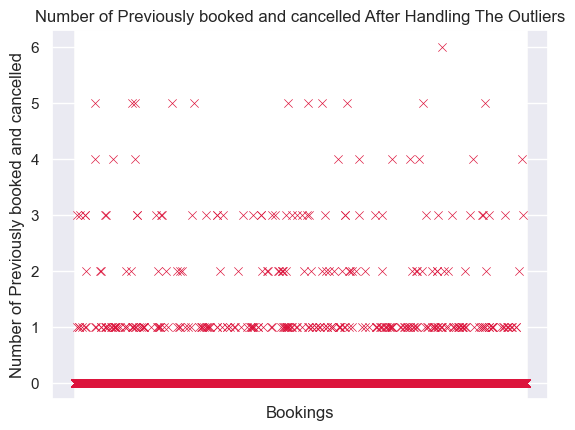

In [57]:
sns.scatterplot(data=df,
                x="Booking_ID",
                y="P_C",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Previously booked and cancelled')
plt.title('Number of Previously booked and cancelled After Handling The Outliers')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

### P-not-C

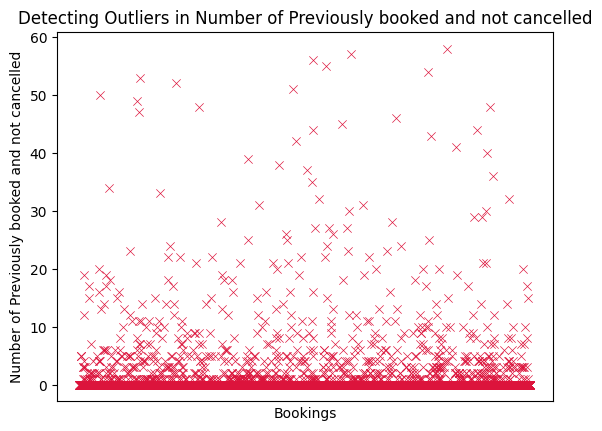

In [ ]:
sns.scatterplot(data=df,
                x="Booking_ID",
                y="P-not-C",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Previously booked and not cancelled')
plt.title('Detecting Outliers in Number of Previously booked and not cancelled')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

In [ ]:
get_outlier(df,'P-not-C')['P-not-C'].describe()

count    812.000000
mean       6.853448
std        9.573749
min        1.000000
25%        1.000000
50%        3.000000
75%        8.000000
max       58.000000
Name: P-not-C, dtype: float64

In [38]:
df.query('P_not_C > 30')['P_not_C'].describe()

count    32.000000
mean     43.781250
std       8.350138
min      31.000000
25%      36.750000
50%      44.000000
75%      50.250000
max      58.000000
Name: P_not_C, dtype: float64

In [ ]:
# Plotting outliers
sns.histplot(df.query('P_not_C > 30')['P_not_C'])

In [72]:
def replace_P_not_C_outlier_with_median_of_similar_rows(df, threshold, col_name='P_not_C'):
    try:
        outlier_index = df[(df[col_name] > threshold)].index
    except TypeError:
        return 'No outlier found'
    for index in outlier_index:
        # Getting the outlier's data
        number_of_adults=df.loc[index,'number_of_adults']
        number_of_children=df.loc[index,'number_of_children']
        number_of_weekend_nights=df.loc[index,'number_of_weekend_nights']
        number_of_week_nights=df.loc[index,'number_of_week_nights']
        type_of_meal=df.loc[index,'type_of_meal']
        room_type=df.loc[index,'room_type']
        average_price=df.loc[index,'average_price']
        # Getting the median of outlier's similar rows 
        new_value =df.query('number_of_adults == @number_of_adults & \
                            number_of_children == @number_of_children & \
                            type_of_meal == @type_of_meal  & \
                            room_type ==@room_type  & \
                            average_price ==@average_price  & \
                            P_C < @threshold')[col_name].median()
        
        df.loc[index,col_name]=round(new_value)
    return 'Outliers filled with similar rows median value'

In [73]:
replace_P_not_C_outlier_with_median_of_similar_rows(df,30)

'Outliers filled with similar rows median value'

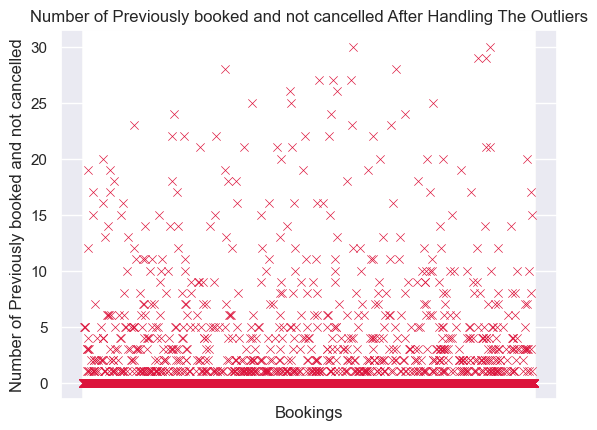

In [43]:
sns.scatterplot(data=df,
                x="Booking_ID",
                y="P_not_C",
                 marker="x",
                 color='crimson'

                )
plt.xlabel('Bookings')
plt.ylabel('Number of Previously booked and not cancelled')
plt.title('Number of Previously booked and not cancelled After Handling The Outliers')
plt.tick_params(axis='both',which='both',labelbottom=False,bottom=False)

# Extracting Feautures

In [75]:
# Reservation date day/month/year
df["reservation_day"] = df["date_of_reservation"].dt.day
df["reservation_month"] = df["date_of_reservation"].dt.month
df["reservation_year"] = df["date_of_reservation"].dt.year

In [76]:
# Arrival day to hotel
# Sum of date of reservation and lead time(day between reservation and arrival)
df['date_of_arrival'] = df['date_of_reservation'].combine(df['lead_time'], lambda x,y: x + pd.DateOffset(days=y))


In [77]:
# Arrival date day/month/year
df["arrival_day"] = df["date_of_arrival"].dt.day
df["arrival_month"] = df["date_of_arrival"].dt.month
df["arrival_year"] = df["date_of_arrival"].dt.year

In [78]:
# how many months between reservation and arrival
df["lead_month"] = np.floor(df["lead_time"]/30).astype('int')

In [79]:
#total staying nights
df["number_of_total_nights"] = df["number_of_weekend_nights"]+df['number_of_week_nights']

In [80]:
#total number of people that staying
df["number_of_total_people"] = df["number_of_children"]+df['number_of_adults']

In [81]:
df[['date_of_reservation','lead_time','date_of_arrival', 'arrival_month','reservation_month','arrival_year']].sample(5)

,date_of_reservation,lead_time,date_of_arrival,arrival_month,reservation_month,arrival_year
4259,2018-07-01,114,2018-10-23,10,7,2018
24937,2018-11-07,90,2019-02-05,2,11,2019
19448,2017-10-22,7,2017-10-29,10,10,2017
2677,2018-08-19,133,2018-12-30,12,8,2018
6270,2018-06-02,25,2018-06-27,6,6,2018


In [82]:
df.to_csv('booking_after_preprocess.csv',index=False)